# Music Informatics Project
Name:Dhananjay Mukhedkar

Program: MSc Autonomous Systems

Email: dhamuk@kth.se


# Introduction
In this music informatics project we perform music instrument classification.We use Medley-DB dataset and take a subset of it.We classify 7 instrument classes viz.guitar,voice,piano,voilin,clarinet,trumpet and flute .The project is divided into 2 parts.In the first part we perform  signal processing and feature extraction.In the second part we perform the classification using KNN and Gaussian Naive Bayes clasifier from the sklearn library.The first part saves the features as a file and second part reads directly from these feature files.The feature files used for the project are also provided in the submission.
Instrument classification is one of the preliminary classification we can perform on audio signals.It can we useful in further classification problems like genre classification ,etc.It also helps in understanding music features useful for different classification purposes.


# Method
We first extract features from the audio signal which represent timbre qualities.After extracting features we perform classification on a KNN model and Gaussian Naive Bayes and compare the performance on different parameters like precision and confusion matrix.

# Dataset
We divide our data into training and test folders.We use subset of Medley-DB dataset for 7 instruments .We also mix our training data wit some of validation data provided in Medley-DB.THe dataset and the notebook files are accessible on github at:
https://github.com/DhananjayMukhedkar/musicInformatics.git

Or alternatively,at google drive :
https://drive.google.com/file/d/1vqR2dn_ZQ_bXu3FdfF0vu0eCrZV2GGex/view?usp=sharing



In [1]:

import numpy as np, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import sklearn, pandas
import librosa, librosa.display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import pickle


In [2]:
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'cividis'
plt.rcParams['image.interpolation'] = None

# Input the root folder for dataset

In [3]:
#input data path
root_path='Z:/musicproject/Medley-data/'

test='test'
train='training'
validation='validation'

# Part 1 :Signal Processing and Feature Extraction

We take a random file from the dataset and its waveform.We also take a look at MFCC by plotting it.

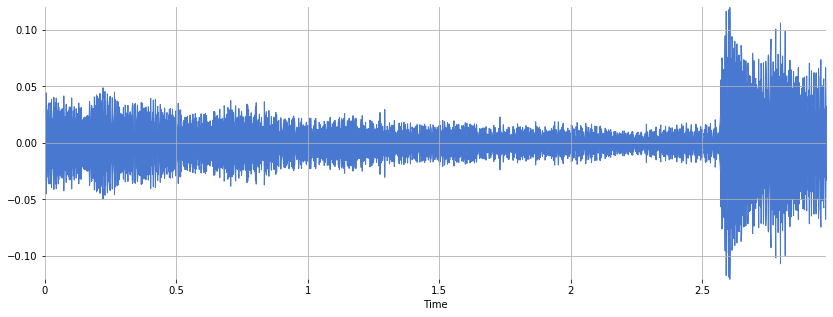

In [4]:
file='piano/training/Medley-solos-DB_training-4_00b70a1f-4010-555d-f6d2-7bc85db31e5d.wav'

x, fs = librosa.load(root_path+file)
librosa.display.waveplot(x, sr=fs)




Listen to the audio :


In [5]:
ipd.Audio(x, rate=fs)

WE now extract and plot MFCC.MFCC are one the important features which convey timbre qualities.

MFCC shape (20, 129)


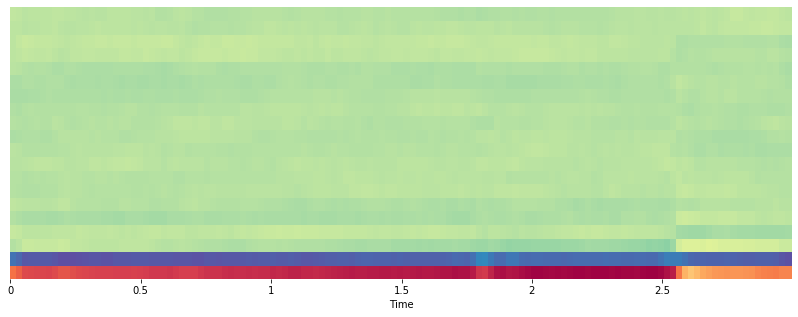

In [6]:
#plottin MFCC
mfccs = librosa.feature.mfcc(x, sr=fs)
print ('MFCC shape ' +str(mfccs.shape))
librosa.display.specshow(mfccs, sr=fs, x_axis='time',cmap='Spectral')

# Features
We extract features important for timbre qualities.Below are the features we extract :
*   MFCC (12 coefficients)
*   Spectral centroid
*   Spectral rolloff
*   Spectral bandwidth
*   Spectral contrast

We take the mean and variance of these features and stack together to form our final feature vector.Our final feature vector has the length 44.


In [7]:
#file suffix id for extracted  features files.The same filesuffix should be present in part2 as input
filesuffix='_final'

In [8]:
import os


#construct feature vector
def construct_features(filepath):  
  
    x, sr = librosa.load(filepath)
    scaler = sklearn.preprocessing.StandardScaler()   
    
    zcc=librosa.feature.zero_crossing_rate(x)
    
    z_mean=zcc.mean(axis=1)
    z_var=zcc.var(axis=1)
    mfcc = librosa.feature.mfcc(x, sr=sr, n_mfcc=n_mfcc).T#mfcc
    #mfcc_scaled = scaler.fit_transform(mfcc)  
    mfcc_mean=mfcc.mean(axis=0)   
    mfcc_var=mfcc.var(axis=0)  
  
    sc=librosa.feature.spectral_centroid(y=x, sr=sr) #centroid
    centroid_mean=sc.mean(axis=1)
    centroid_var=sc.var(axis=1)
    spectral_rolloff_vector = librosa.feature.spectral_rolloff(x, sr=sr) #rolloff
    spectral_rolloff_mean=spectral_rolloff_vector.mean(axis=1)
    spectral_rolloff_var=spectral_rolloff_vector.var(axis=1)

    #contrast  
    S = np.abs(librosa.stft(x))
    contrast = librosa.feature.spectral_contrast(S=S, sr=sr)  
    contrast_mean=contrast.mean(axis=1)   
    contrast_var=contrast.var(axis=1)
    #bandwidth
    bd=librosa.feature.spectral_bandwidth(S=S)
    bd_mean=bd.mean(axis=1)
    bd_var=bd.var(axis=1)   
    
    
    feature=np.hstack((mfcc_mean,centroid_mean,spectral_rolloff_mean,bd_mean,contrast_mean,mfcc_var,centroid_var,spectral_rolloff_var,bd_var,contrast_var))#,c_var,sr_var,z_var
       
    return feature


def get_features(n_mfcc,path,limit=None):  
  
  folder = os.fsencode(path)
  print(folder)
  features= []
  list1=os.listdir(path)
  
  for i,file in enumerate(list1) :
    
    if(i==limit) :      
      break
    
    file = os.fsdecode(file)
    feature=construct_features(path+file)
 
    features.append(feature)
        
  return features

    

In [9]:
#construct the features list and save 
instrument=['guitar','voice','piano','clarinet','flute','trumpet','voilin']

dataset=test
n_mfcc = 12 #mfcc coeffs
features_test={}
limitdata=1 #optional to limit number of files to extract features


for i in instrument:
  path=root_path+i+'/'+dataset+'/'
  #print(path)
  l=get_features(n_mfcc,path,limitdata) #call feature extraction
  #features_test[i]=l
  with open(root_path+i+'_features_'+dataset+filesuffix, "wb") as fp:
    #Pickling
    pickle.dump(l, fp)
   
print('Done extracting test set.')
  

b'Z:/musicproject/Medley-data/guitar/test/'
b'Z:/musicproject/Medley-data/voice/test/'
b'Z:/musicproject/Medley-data/piano/test/'
b'Z:/musicproject/Medley-data/clarinet/test/'
b'Z:/musicproject/Medley-data/flute/test/'
b'Z:/musicproject/Medley-data/trumpet/test/'
b'Z:/musicproject/Medley-data/voilin/test/'
Done extracting test set.


In [10]:
#run feature extracting on training data
dataset=train 
features_train={}

for i in instrument:
  path=root_path+i+'/'+dataset+'/'  
  l=get_features(n_mfcc,path,limitdata) #call feature extraction 
  with open(root_path+i+'_features_'+dataset+filesuffix, "wb") as fp:
    #Pickling
    pickle.dump(l, fp)   
    
    
    
print('Done extracting training set.')

b'Z:/musicproject/Medley-data/guitar/training/'
b'Z:/musicproject/Medley-data/voice/training/'
b'Z:/musicproject/Medley-data/piano/training/'
b'Z:/musicproject/Medley-data/clarinet/training/'
b'Z:/musicproject/Medley-data/flute/training/'
b'Z:/musicproject/Medley-data/trumpet/training/'
b'Z:/musicproject/Medley-data/voilin/training/'
Done extracting training set.


# Next step

The features files are constructed for every instrument and test and training dataset.We use these files in the second part to do our classification. We can now run our classification in part 2.